In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from math import pi, inf
from sympy import limit
import time
from scipy.special import jv 
from itertools import product
import time
from scipy import real

In [18]:
# Parameters Barnes

data1 = {"alpha" : 1/137, "c" : 1, "m1" : 1, "m2" : 1, "e1" : 1, "n1" : 1, "n2" : 1.65, "theta1" : 0, "theta2" : pi,  "w" : 1}
data1["delta"] = data1["alpha"]*data1["m1"]*data1["m2"]*(data1["theta1"] - data1["theta2"])/pi
data1["scale"] = (data1["w"]/(2*pi*data1["c"]))**(-1)
data1["e2"] = 16
data1["k1"] = data1["n1"]*data1["w"]/data1["c"]
data1["k2"] = data1["n2"]*data1["w"]/data1["c"]
data1['n2'] = np.sqrt(data1['e2']*data1['m2'])

data2 = {"alpha" : 1/137, "c" : 1, "m1" : 1, "m2" : 1, "e1" : 1, "n1" : 1, "n2" : 1.65, "theta1" : 0, "theta2" : 100000*pi,  "w" : 1}
data2["delta"] = data2["alpha"]*data2["m1"]*data2["m2"]*(data2["theta1"] - data2["theta2"])/pi
data2["scale"] = (data2["w"]/(2*pi*data2["c"]))**(-1)
data2["e2"] = 16
data2["k1"] = data2["n1"]*data2["w"]/data2["c"]
data2["k2"] = data2["n2"]*data2["w"]/data2["c"]
data2['n2'] = np.sqrt(data2['e2']*data2['m2'])

data3 = {"alpha" : 1/137, "c" : 1, "m1" : 1, "m2" : 1, "e1" : 1, "n1" : 1, "n2" : 1.65, "theta1" : 0, "theta2" : 0,  "w" : 1}
data3["delta"] = data3["alpha"]*data3["m1"]*data3["m2"]*(data3["theta1"] - data3["theta2"])/pi
data3["scale"] = (data3["w"]/(2*pi*data3["c"]))**(-1)
data3["e2"] = 16
data3["k1"] = data3["n1"]*data3["w"]/data3["c"]
data3["k2"] = data3["n2"]*data3["w"]/data3["c"]
data3['n2'] = np.sqrt(data3['e2']*data3['m2'])


data_lifetime = {"alpha" : 1/137, "c" : 299792458, "m1" : 1, "m2" : 1, "e1" : 1, "n1" : 1, "n2" : 1.65, "theta1" : 0, "theta2" : pi,  "w" : 1}
# data_lifetime['m2'] = data_lifetime['m1']*(np.sqrt(0.48**2+17.3**2)*4*pi*10**(-7) + 1) 
# e1 = 8.85*10**(-12), m1 = 4*pi*10**(-7)
# data_lifetime['alpha'] = 1/137
# data_lifetime["e2"] = 7.572
data_lifetime['m2'] = 1.00046
data_lifetime["e2"] = (data_lifetime['n2']**2)/data_lifetime['m2']
# data_lifetime["m2"] = (data_lifetime['n2']**2)/data_lifetime['e2']
data_lifetime['w'] = 2*pi*data_lifetime['c']/(600*10**(-9))
data_lifetime["delta"] = data_lifetime["alpha"]*data_lifetime["m1"]*data_lifetime["m2"]*(data_lifetime["theta1"] - data_lifetime["theta2"])/pi
data_lifetime["scale"] = 1
data_lifetime["k1"] = data_lifetime["n1"]*data_lifetime["w"]/data_lifetime["c"]
data_lifetime["k2"] = data_lifetime["n2"]*data_lifetime["w"]/data_lifetime["c"]

In [19]:
def Rtmtm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c):
  thingy = ( (e2*np.sqrt(k1**2-kp**2)-e1*np.sqrt(k2**2-kp**2) )*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)/( (e2*np.sqrt(k1**2-kp**2) + e1*np.sqrt(k2**2-kp**2) )*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
  return thingy

def Rtetm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c):
  thingy = -2*m2*n1*np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta/( (e2*np.sqrt(k1**2-kp**2) + e1*np.sqrt(k2**2-kp**2) )*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
  return thingy

def Rtete(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c):
  thingy = ( (m2*np.sqrt(k1**2-kp**2)-m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)/( (m2*np.sqrt(k1**2-kp**2) + m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
  return thingy

def Rtmte(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c):
  thingy = -2*m2*n1*np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta/( (m2*np.sqrt(k1**2-kp**2) + m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
  return thingy

In [20]:
def GRzz_integrand(kp, x, y, z, zp, data=data1):
    k1 = data["k1"]
    return np.imag((1j/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(0,kp*np.sqrt(x**2+y**2))*(kp**3/(k1**2*np.sqrt(k1**2-kp**2)))*Rtmtm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"]))

def GRyz_integrand(kp, x, y, z, zp, data=data1):
    k1 = data["k1"]
    return np.imag((1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/(k1*np.sqrt(k1**2-kp**2)))*Rtetm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"]))

def GRxz_integrand(kp, x, y, z, zp, data=data1):
    k1 = data["k1"]
    return np.imag((1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/k1)*Rtmtm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"]))

def GRxx_integrand(kp, x, y, z, zp, data=data1):
    rtmtm = Rtmtm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    rtete = Rtete(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    k1 = data["k1"]
    return np.imag((1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp/(np.sqrt(k1**2-kp**2)))*rtete - (jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp*np.sqrt(k1**2-kp**2)/k1**2)*rtmtm))

def GRyx_integrand(kp, x, y, z, zp, data=data1):
    rtetm = Rtetm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    rtmte = Rtmte(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    k1 = data["k1"]
    return np.imag((-1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp/k1)*rtetm + (jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp/k1)*rtmte))

def GRzx_integrand(kp, x, y, z, zp, data=data1):
    rtmtm = Rtmtm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    k1 = data["k1"]
    return np.imag((-1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/k1**2)*rtmtm)

def GRyy_integrand(kp, x, y, z, zp, data=data1):
    rtmtm = Rtmtm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    rtete = Rtete(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    k1 = data["k1"]
    return np.imag((1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp/(np.sqrt(k1**2-kp**2)))*rtete - (jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp*np.sqrt(k1**2-kp**2)/k1**2)*rtmtm))

def GRxy_integrand(kp, x, y, z, zp, data=data1):
    rtetm = Rtetm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    rtmte = Rtmte(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    k1 = data["k1"]
    return np.imag((1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp/k1)*rtetm + (jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp/k1)*rtmte))

def GRzy_integrand(kp, x, y, z, zp, data=data1):
    rtmte = Rtmte(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    k1 = data["k1"]
    return np.imag((1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/(k1*np.sqrt(k1**2-kp**2)))*rtmte)

In [21]:
def G_xz(x, y, z, zp=900*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRxz_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

def G_yz(x, y, z, zp=900*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRyz_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

def G_zz(x, y, z, zp=900*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRzz_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

def G_xx(x, y, z, zp=900*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRxx_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

def G_yx(x, y, z, zp=900*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRyx_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

def G_zx(x, y, z, zp=900*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRzx_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

def G_xy(x, y, z, zp=900*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRxy_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

def G_yy(x, y, z, zp=900*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRyy_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

def G_zy(x, y, z, zp=900*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRzy_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

In [22]:
Gzz = np.vectorize(G_zz)
Gyz = np.vectorize(G_yz)
Gxz = np.vectorize(G_xz)
Gxx = np.vectorize(G_xx)
Gyx = np.vectorize(G_yx)
Gzx = np.vectorize(G_zx)
Gxy = np.vectorize(G_xy)
Gyy = np.vectorize(G_yy)
Gzy = np.vectorize(G_zy)

In [23]:
start = time.time()

x = np.arange(-1200,1200, 24)
y = [0]*len(x)
z = np.arange(0,1800, 18)

x,z = np.meshgrid(x,z)

end = time.time()
print('elapsed time xyz product: {} seg'.format(end - start))

elapsed time xyz product: 0.0009646415710449219 seg


In [24]:
# PLDOSes
def rho_xz(x, y, z, data=data1):
    return 1 + (6*pi*data['c']*data['n1']**2/data['w'])*Gxz(x,y,z,z,data)

def rho_yz(x, y, z, data=data1):
    return 1 + (6*pi*data['c']*data['n1']**2/data['w'])*Gyz(x,y,z,z,data)

def rho_zz(x, y, z, data=data1):
    return 1 + (6*pi*data['c']*data['n1']**2/data['w'])*Gzz(x,y,z,z,data)

def rho_xx(x, y, z, data=data1):
    return 1 + (6*pi*data['c']*data['n1']**2/data['w'])*Gxx(x,y,z,z,data)

def rho_yx(x, y, z, data=data1):
    return 1 + (6*pi*data['c']*data['n1']**2/data['w'])*Gyx(x,y,z,z,data)

def rho_zx(x, y, z, data=data1):
    return 1 + (6*pi*data['c']*data['n1']**2/data['w'])*Gzx(x,y,z,z,data)

def rho_xy(x, y, z, data=data1):
    return 1 + (6*pi*data['c']*data['n1']**2/data['w'])*Gxy(x,y,z,z,data)

def rho_yy(x, y, z, data=data1):
    return 1 + (6*pi*data['c']*data['n1']**2/data['w'])*Gyy(x,y,z,z,data)

def rho_zy(x, y, z, data=data1):
    return 1 + (6*pi*data['c']*data['n1']**2/data['w'])*Gzy(x,y,z,z,data)

In [25]:
#LDOS y Lifetime 
def ldos(x, y, z, data=data1):
    return 1 + ((2*pi*data['c']*data['n1']**2)/(data['w']))*(Gxx(x,y,z,z,data=data)+Gyy(x,y,z,z,data=data)+Gzz(x,y,z,z,data=data))

def lifetime(x, y, z, data=data1, t_inf=1, eta=0.61):
    return t_inf/(1 + eta*(ldos(x, y, z, data=data) - 1))

In [26]:
zl = np.arange(0, 1240, 1)

start = time.time()
lifetime_points1 = lifetime(0,0,zl*10**(-9), data=data_lifetime, t_inf=2.54)

end = time.time()
print('** elapsed time for lifetime calculations: {} seg'.format(end - start))

<ipython-input-21-067ae24b7463>:15: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(GRxx_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]
<ipython-input-21-067ae24b7463>:15: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return quad(GRxx_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]
<ipython-input-21-067ae24b7463>:31: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(GRyy_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]
<ipython-input-21-067ae24b7463>:31: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output 

Text(0, 0.5, '$\\tau(z)/\\tau(\\infty)$')

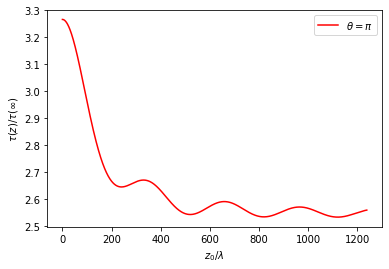

In [27]:
fig, ax = plt.subplots()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

perp, = ax.plot(zl, lifetime_points1, label=r'$\theta=\pi$', color= 'red') 
# parall, = ax.plot(zl, lifetime_points2, label=r'$\theta>>\pi$', color= 'blue')

ax.legend(handles=[perp], prop={'size': 10})
ax.set_xlabel(r'$z_0/\lambda$')
ax.set_ylabel(r'$\tau(z)/\tau(\infty)$')

In [29]:
def pldos_perp(x, y, z, data=data1):
    return 1 + ((6*pi*data['c']*data['n1']**2)/(data['w']))*(Gzz(x,y,z,z,data))

def pldos_paral(x, y, z, data=data1):
    return 1 + ((3*pi*data['c']*data['n1']**2)/(data['w']))*(Gxx(x,y,z,z,data)+Gyy(x,y,z,z,data))

<ipython-input-21-067ae24b7463>:11: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(GRzz_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]
<ipython-input-21-067ae24b7463>:15: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(GRxx_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]
<ipython-input-21-067ae24b7463>:15: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return quad(GRxx_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]
<ipython-input-21-067ae24b7463>:31: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(GRyy_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]
<ipython-input-21-067ae24b7463>:31: IntegrationWarning: The algorithm doe

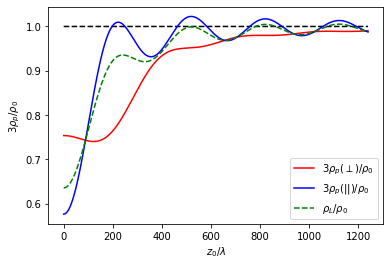

elapsed time: 144.32549691200256 seg


In [33]:
start = time.time()

x = np.arange(0,1240, 1)
y_perp = pldos_perp(0, 0, x*10**(-9), data=data_lifetime)
y_parall = pldos_paral(0, 0, x*10**(-9), data=data_lifetime)
y_ldos = ldos(0, 0, x*10**(-9), data=data_lifetime)

# %%
fig, ax = plt.subplots()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

base_line, = ax.plot(x, [1 for z in x], linestyle='--', color= 'black')
perp, = ax.plot(x, y_perp, label=r'$3\rho_p(\perp)/\rho_0$', color= 'red') 
parall, = ax.plot(x, y_parall, label=r'$3\rho_p(||)/\rho_0$', color= 'blue')
gldos, = ax.plot(x, y_ldos, linestyle='--', label=r'$\rho_L/\rho_0$', color= 'green')

ax.legend(handles=[perp, parall, gldos], prop={'size': 10})
ax.set_xlabel(r'$z_0/\lambda$')
ax.set_ylabel(r'$3\rho_p/\rho_0$')
plt.show()

end = time.time()
print('elapsed time: {} seg'.format(end - start))

In [15]:
start = time.time()
Gzz_points1 = Gzz(x*10**(-9),0,z*10**(-9), data=data_lifetime)
end = time.time()
print('** elapsed time for Gzz calculations: {} seg'.format(end - start))

start = time.time()
Gyz_points1 = Gyz(x*10**(-9),0,z*10**(-9), data=data_lifetime)
end = time.time()
print('** elapsed time for Gyz calculations: {} seg'.format(end - start))

start = time.time()
Gxz_points1 = Gxz(x*10**(-9),0,z*10**(-9), data=data_lifetime)
end = time.time()
print('** elapsed time for Gxz calculations: {} seg'.format(end - start))

start = time.time()
Gxx_points1 = Gxx(x*10**(-9),0,z*10**(-9), data=data_lifetime)
end = time.time()
print('** elapsed time for Gxx calculations: {} seg'.format(end - start))

start = time.time()
Gyx_points1 = Gyx(x*10**(-9),0,z*10**(-9), data=data_lifetime)
end = time.time()
print('** elapsed time for Gyx calculations: {} seg'.format(end - start))

start = time.time()
Gzx_points1 = Gzx(x*10**(-9),0,z*10**(-9), data=data_lifetime)
end = time.time()
print('** elapsed time for Gzx calculations: {} seg'.format(end - start))

start = time.time()
Gxy_points1 = Gxy(x*10**(-9),0,z*10**(-9), data=data_lifetime)
end = time.time()
print('** elapsed time for Gxy calculations: {} seg'.format(end - start))

start = time.time()
Gyy_points1 = Gyy(x*10**(-9),0,z*10**(-9), data=data_lifetime)
end = time.time()
print('** elapsed time for Gyy calculations: {} seg'.format(end - start))

start = time.time()
Gzy_points1 = Gzy(x*10**(-9),0,z*10**(-9), data=data_lifetime)
end = time.time()
print('** elapsed time for Gzy calculations: {} seg'.format(end - start))

<ipython-input-5-067ae24b7463>:11: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(GRzz_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]
<ipython-input-5-067ae24b7463>:11: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return quad(GRzz_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]
** elapsed time for Gzz calculations: 113.86902165412903 seg
** elapsed time for Gyz calculations: 67.29778671264648 seg
** elapsed time for Gxz calculations: 80.34066987037659 seg
<ipython-input-5-067ae24b7463>:15: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(GRxx_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]
<ipython-input-5-067ae24b7463>:15: IntegrationWarning: The algorithm does not co

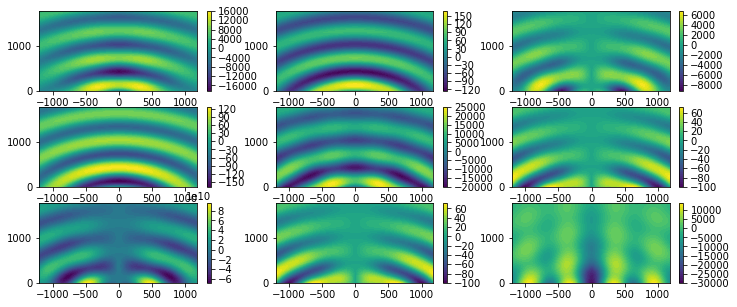

In [16]:
fig, axs = plt.subplots(3, 3, figsize=(12,5))
cs00 = axs[0,0].contourf(x, z, Gxx_points1, 50)
cs01 = axs[0,1].contourf(x, z, Gyx_points1, 50)
cs02 = axs[0,2].contourf(x, z, Gzx_points1, 50)
cs10 = axs[1,0].contourf(x, z, Gxy_points1, 50)
cs11 = axs[1,1].contourf(x, z, Gyy_points1, 50)
cs12 = axs[1,2].contourf(x, z, Gzy_points1, 50)
cs20 = axs[2,0].contourf(x, z, Gxz_points1, 50)
cs21 = axs[2,1].contourf(x, z, Gyz_points1, 50)
cs22 = axs[2,2].contourf(x, z, Gzz_points1, 50)

fig.colorbar(cs00, ax=axs[0,0])
fig.colorbar(cs01, ax=axs[0,1])
fig.colorbar(cs02, ax=axs[0,2])
fig.colorbar(cs10, ax=axs[1,0])
fig.colorbar(cs11, ax=axs[1,1])
fig.colorbar(cs12, ax=axs[1,2])
fig.colorbar(cs20, ax=axs[2,0])
fig.colorbar(cs21, ax=axs[2,1])
fig.colorbar(cs22, ax=axs[2,2])